# Importing Needed Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

# Importing our CSV data file 

In [2]:
data=pd.read_csv("Data for Associate DS.csv")
data.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [3]:
data[data.columns[0]].isnull().value_counts()


False    8950
Name: CUST_ID, dtype: int64

In [4]:
data.rename(columns={data.columns[0]:'cust_id'}).head()


cust_id      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

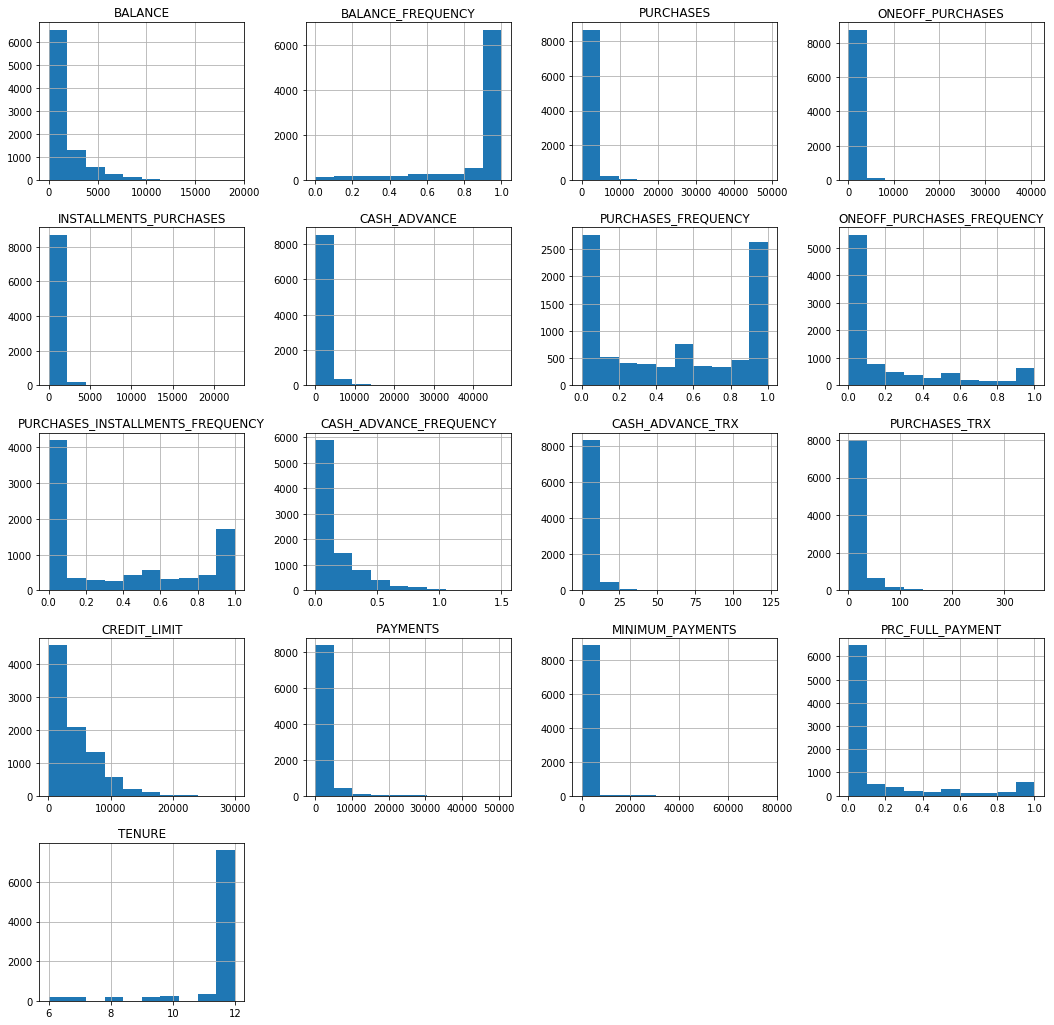

In [54]:
# EXPORATORY DATA ANALYSIS
data.hist(figsize=(18,18));

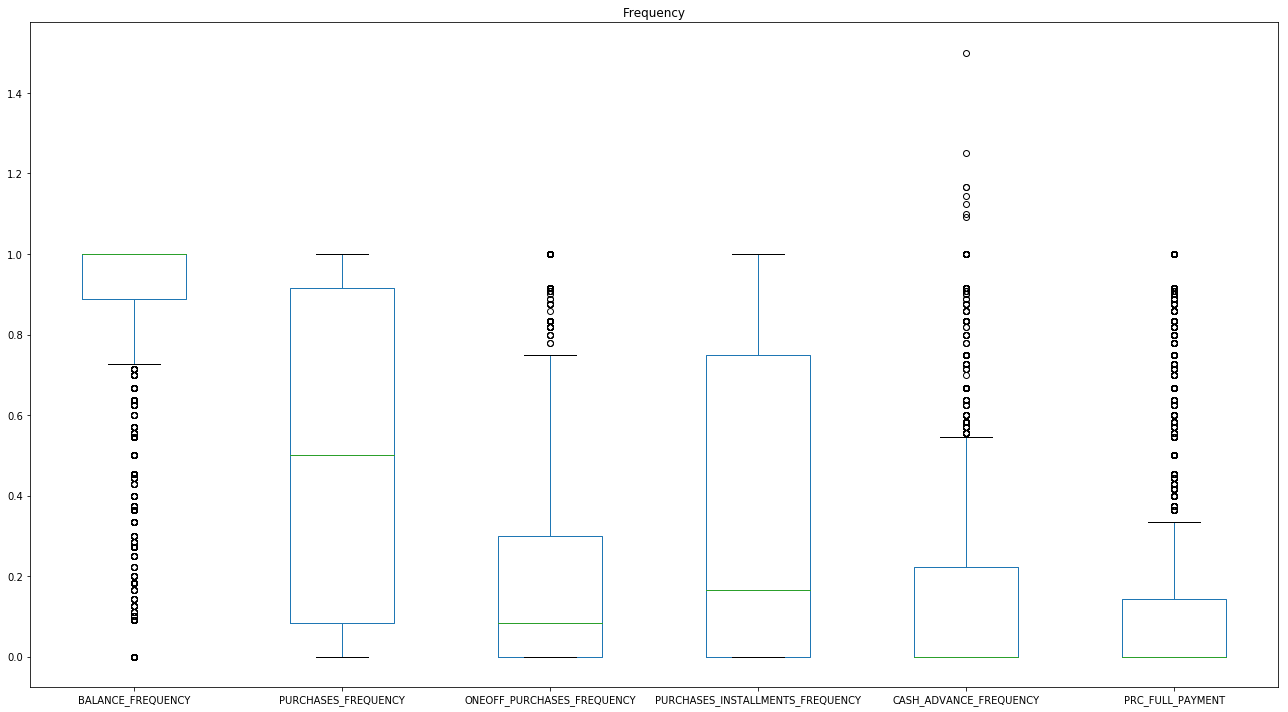

In [55]:
#let's see how are distributed the frequency variables

data[['BALANCE_FREQUENCY',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
'PRC_FULL_PAYMENT']].plot.box(figsize=(18,10),title='Frequency',legend=True);
plt.tight_layout()
# We have data on Cash_advance_frequency that is wrong. I will clean the dataset later.
# There are also many outliers, but we will keep then for now

# Checking null values in our data

In [5]:
total = data.isnull().sum(axis=0).sort_values(ascending=False)
percent = ((data.isnull().sum(axis=0)/data.isnull().count(axis=0))*100).sort_values(ascending=False)

# count the number of null values in the column and their perecentage of the total data
missing_data_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_columns.head(20)

Total   Percent
MINIMUM_PAYMENTS                    313  3.497207
CREDIT_LIMIT                          1  0.011173
TENURE                                0  0.000000
PURCHASES_FREQUENCY                   0  0.000000
BALANCE                               0  0.000000
BALANCE_FREQUENCY                     0  0.000000
PURCHASES                             0  0.000000
ONEOFF_PURCHASES                      0  0.000000
INSTALLMENTS_PURCHASES                0  0.000000
CASH_ADVANCE                          0  0.000000
ONEOFF_PURCHASES_FREQUENCY            0  0.000000
PRC_FULL_PAYMENT                      0  0.000000
PURCHASES_INSTALLMENTS_FREQUENCY      0  0.000000
CASH_ADVANCE_FREQUENCY                0  0.000000
CASH_ADVANCE_TRX                      0  0.000000
PURCHASES_TRX                         0  0.000000
PAYMENTS                              0  0.000000
CUST_ID                               0  0.000000

# We know that we can fill the null values by the help of Imputer . So using Sklearn for Imputer . We know we can fill the null values by the help of finding the mean of that perticular column .

In [6]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values = np.nan, strategy='median')
imp_mean.fit(data[['MINIMUM_PAYMENTS']])
data['MINIMUM_PAYMENTS'] = imp_mean.transform(data[['MINIMUM_PAYMENTS']])

In [7]:
data.drop(5203,axis=0,inplace=True) #dropping a missing value


In [8]:
data.columns


Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

# Now we will try to see the measure of spread & variability of data in our data set . So I tried to find measures of dispersion using IQR (Inter Quartile Range) . It is also used for treatment of our outliers .

In [9]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
iqr=q3-q1
ll=q1-(1.5*iqr)
ul=q3+(1.5*iqr)

In [10]:
num=list()
for a in data.columns:
    if a in ll.index:
        num.append(a)

In [11]:
data=data[num]


In [12]:
df = data[~((data < (q1 - 1.5 * iqr)) |(data > (q3 + 1.5 * iqr))).any(axis=1)]


In [13]:
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     40.900749           0.818182      95.40              0.00   
4    817.714335           1.000000      16.00             16.00   
7   1823.652743           1.000000     436.20              0.00   
8   1014.926473           1.000000     861.49            661.49   
14  2772.772734           1.000000       0.00              0.00   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     95.4       0.00000             0.166667   
4                      0.0       0.00000             0.083333   
7                    436.2       0.00000             1.000000   
8                    200.0       0.00000             0.333333   
14                     0.0     346.81139             0.000000   

    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                     0.000000                          0.083333   
4                     0.083333                          0.000000   
7                     0.000000                          1.000000   
8                     0.083333                          0.250000   
14                    0.000000                          0.000000   

    CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                 0.000000                 0              2        1000.0   
4                 0.000000                 0              1        1200.0   
7                 0.000000                 0             12        2300.0   
8                 0.000000                 0              5        7000.0   
14                0.083333                 1              0        3000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787               0.0      12  
4   678.334763        244.791237               0.0      12  
7   679.065082        532.033990               0.0      12  
8   688.278568        311.963409               0.0      12  
14  805.647974        989.962866               0.0      12

# Now doing some visualization for those columns who are showing costomers past purchases bsed on  total purchase amount spent during last 12 months . Visualization is done using box plots which shows the measure of center tendency by finding the median .

C:\Users\Saurav\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


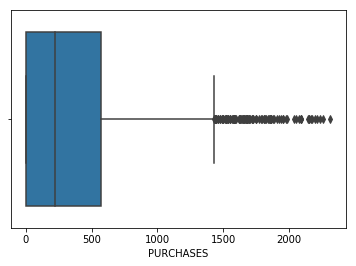

In [14]:
# plt.figure(figsize=(20,10))
sns.boxplot(df['PURCHASES']) #Total purchase amount spent during last 12 months

C:\Users\Saurav\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


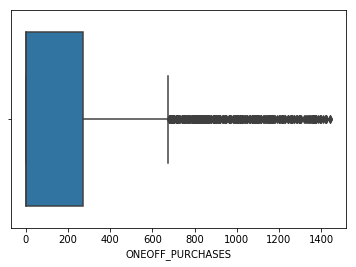

In [15]:
# plt.figure(figsize=(20,10))
sns.boxplot(df['ONEOFF_PURCHASES'])

C:\Users\Saurav\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


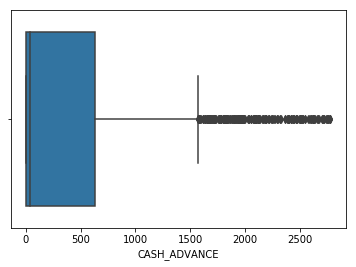

In [16]:
sns.boxplot(df['CASH_ADVANCE'])


C:\Users\Saurav\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


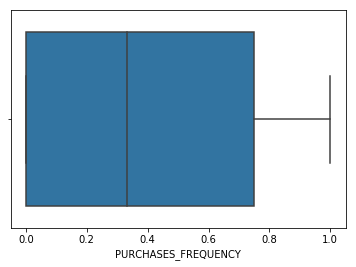

In [17]:
sns.boxplot(df['PURCHASES_FREQUENCY'])


C:\Users\Saurav\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


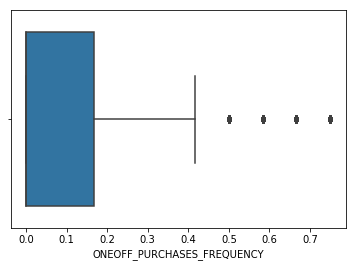

In [18]:
sns.boxplot(df['ONEOFF_PURCHASES_FREQUENCY'])


C:\Users\Saurav\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


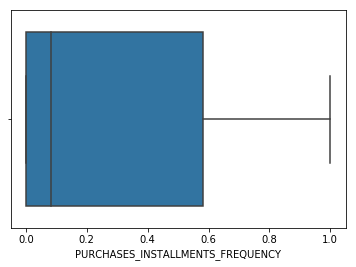

In [19]:
sns.boxplot(df['PURCHASES_INSTALLMENTS_FREQUENCY'])


# Now finding the correlation between all the columns in our data . Correlation is basically used for finding the relationship between the variables i.e it will show us how much one variable is changes if another one will be modified .

In [62]:
data.corr()

BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                           1.000000           0.322335   0.181230   
BALANCE_FREQUENCY                 0.322335           1.000000   0.133586   
PURCHASES                         0.181230           0.133586   1.000000   
ONEOFF_PURCHASES                  0.164326           0.104257   0.916844   
INSTALLMENTS_PURCHASES            0.126437           0.124204   0.679889   
CASH_ADVANCE                      0.496679           0.099312  -0.051495   
PURCHASES_FREQUENCY              -0.078054           0.229440   0.392991   
ONEOFF_PURCHASES_FREQUENCY        0.073114           0.202295   0.498413   
PURCHASES_INSTALLMENTS_FREQUENCY -0.063267           0.175869   0.315537   
CASH_ADVANCE_FREQUENCY            0.449246           0.192022  -0.120137   
CASH_ADVANCE_TRX                  0.385139           0.141516  -0.067194   
PURCHASES_TRX                     0.154297           0.189527   0.689552   
CREDIT_LIMIT                      0.531283           0.095843   0.356963   
PAYMENTS                          0.322769           0.064842   0.603252   
MINIMUM_PAYMENTS                  0.397906           0.131128   0.095772   
PRC_FULL_PAYMENT                 -0.319018          -0.095308   0.180356   
TENURE                            0.072421           0.118566   0.086155   

                                  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
BALANCE                                   0.164326                0.126437   
BALANCE_FREQUENCY                         0.104257                0.124204   
PURCHASES                                 0.916844                0.679889   
ONEOFF_PURCHASES                          1.000000                0.330610   
INSTALLMENTS_PURCHASES                    0.330610                1.000000   
CASH_ADVANCE                             -0.031341               -0.064264   
PURCHASES_FREQUENCY                       0.264913                0.442398   
ONEOFF_PURCHASES_FREQUENCY                0.524881                0.214016   
PURCHASES_INSTALLMENTS_FREQUENCY          0.127699                0.511334   
CASH_ADVANCE_FREQUENCY                   -0.082622               -0.132312   
CASH_ADVANCE_TRX                         -0.046226               -0.074017   
PURCHASES_TRX                             0.545514                0.628097   
CREDIT_LIMIT                              0.319724                0.256499   
PAYMENTS                                  0.567283                0.384066   
MINIMUM_PAYMENTS                          0.050243                0.134003   
PRC_FULL_PAYMENT                          0.132745                0.182548   
TENURE                                    0.064047                0.086016   

                                  CASH_ADVANCE  PURCHASES_FREQUENCY  \
BALANCE                               0.496679            -0.078054   
BALANCE_FREQUENCY                     0.099312             0.229440   
PURCHASES                            -0.051495             0.392991   
ONEOFF_PURCHASES                     -0.031341             0.264913   
INSTALLMENTS_PURCHASES               -0.064264             0.442398   
CASH_ADVANCE                          1.000000            -0.215579   
PURCHASES_FREQUENCY                  -0.215579             1.000000   
ONEOFF_PURCHASES_FREQUENCY           -0.086786             0.501305   
PURCHASES_INSTALLMENTS_FREQUENCY     -0.177118             0.862921   
CASH_ADVANCE_FREQUENCY                0.628535            -0.308483   
CASH_ADVANCE_TRX                      0.656493            -0.203541   
PURCHASES_TRX                        -0.075877             0.568408   
CREDIT_LIMIT                          0.303985             0.119788   
PAYMENTS                              0.453226             0.103393   
MINIMUM_PAYMENTS                      0.140735             0.006106   
PRC_FULL_PAYMENT                     -0.152961             0.305761   
TENURE                               -0.068552        

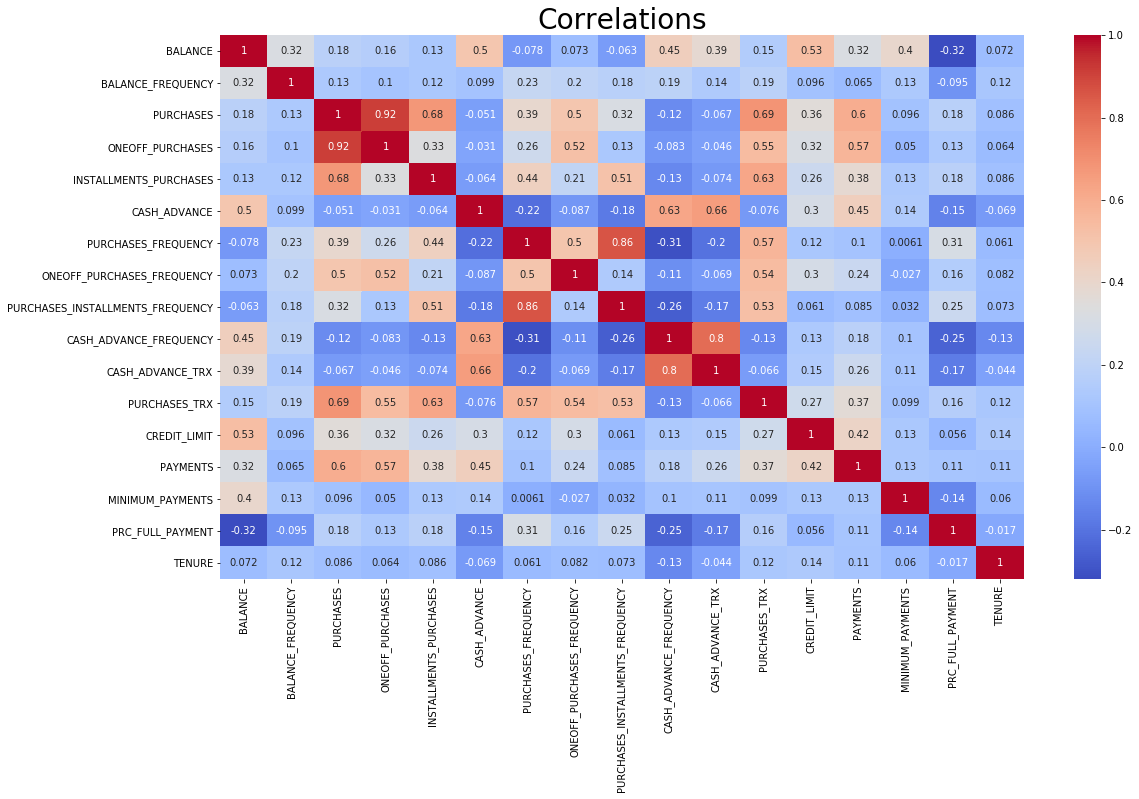

In [57]:
#Lets take a look at how the  variables are correlated
plt.figure(figsize=(18,10))
sns.heatmap(data.corr(),cmap='coolwarm',annot=True);
plt.title('Correlations', size = 28);

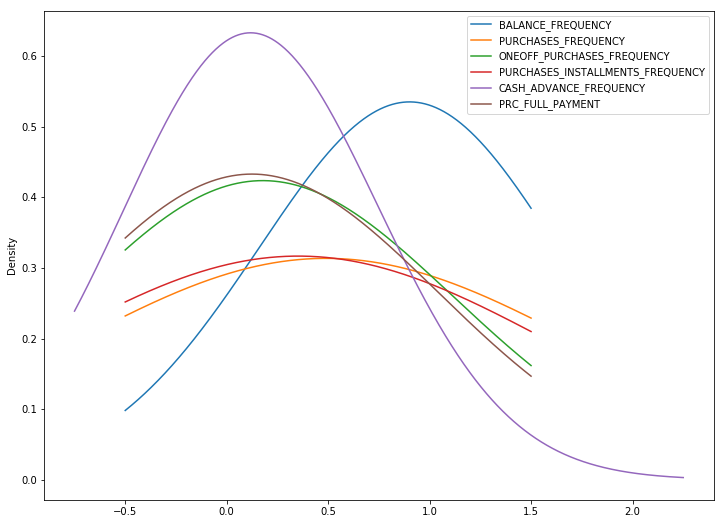

In [59]:
ax = data[['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY',
         'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
         'CASH_ADVANCE_FREQUENCY','PRC_FULL_PAYMENT']].plot.kde(figsize=(12,9), bw_method=3) 

C:\Users\Saurav\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


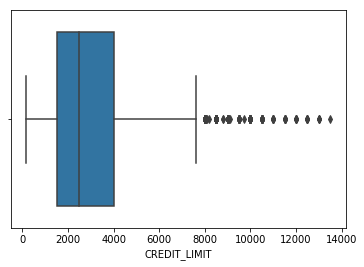

In [21]:
sns.boxplot(df['CREDIT_LIMIT'])


# Finding KPIs according to the problem statement . Key performance indicator will show us how effectively the company is achieving the objective goal with respect to each other features .

In [22]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

C:\Users\Saurav\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


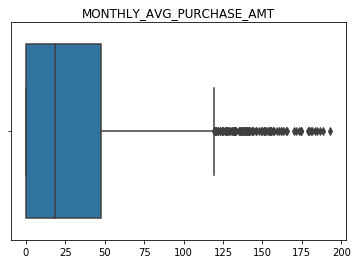

In [23]:

plt.title("MONTHLY_AVG_PURCHASE_AMT")
sns.boxplot(df['PURCHASES']/df['TENURE'])

C:\Users\Saurav\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


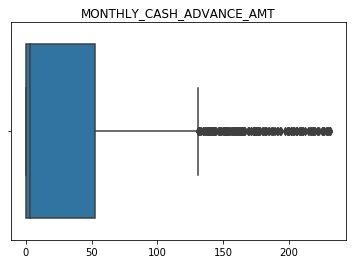

In [24]:

plt.title("MONTHLY_CASH_ADVANCE_AMT")
sns.boxplot(df['CASH_ADVANCE']/df['TENURE'])

C:\Users\Saurav\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


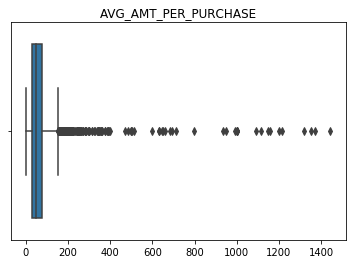

In [25]:

plt.title("AVG_AMT_PER_PURCHASE")
sns.boxplot(df['PURCHASES']/df['PURCHASES_TRX'])

C:\Users\Saurav\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


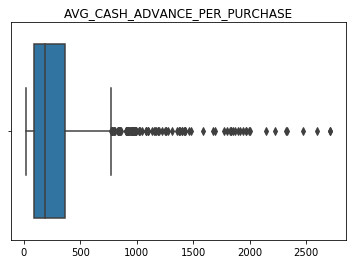

In [26]:
plt.title("AVG_CASH_ADVANCE_PER_PURCHASE")
sns.boxplot(df['CASH_ADVANCE']/df['CASH_ADVANCE_TRX'])

C:\Users\Saurav\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


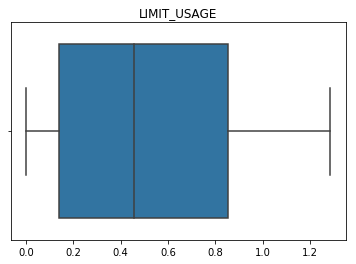

In [27]:
plt.title("LIMIT_USAGE")
sns.boxplot(df['BALANCE']/df['CREDIT_LIMIT'])

C:\Users\Saurav\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


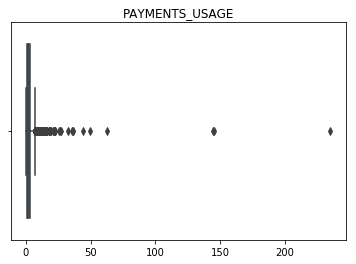

In [28]:
plt.title("PAYMENTS_USAGE")
sns.boxplot(df['PAYMENTS']/df['MINIMUM_PAYMENTS'])

# Analysis of Clusters within Data . First we will do feature scaling for finding the distance between the data points by which we can see the spread of the data . For this we will use standerization where the mean will be zero & stander deviation will be one .

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_std=pd.DataFrame(scaler.fit_transform(df))

In [30]:
for i in range(len(df.columns)):
    df_std.rename(columns={i:df.columns[i]},inplace=True)


In [31]:
df_std.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -1.132974          -2.601516  -0.632433         -0.601500   
1 -0.374911           0.339842  -0.811387         -0.553358   
2  0.606746           0.339842   0.135668         -0.601500   
3 -0.182459           0.339842   1.094195          1.388850   
4  1.532956           0.339842  -0.847448         -0.601500   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.316464     -0.642027            -0.605153   
1               -0.689420     -0.642027            -0.828930   
2                1.015856     -0.642027             1.632603   
3                0.092458     -0.642027            -0.157603   
4               -0.689420     -0.108684            -1.052705   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.666536                         -0.582755   
1                   -0.184397                         -0.805388   
2                   -0.666536                          1.866215   
3                   -0.184397                         -0.137487   
4                   -0.666536                         -0.805388   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.795269         -0.733259      -0.639389     -0.905506   
1               -0.795269         -0.733259      -0.752641     -0.823006   
2               -0.795269         -0.733259       0.493139     -0.369261   
3               -0.795269         -0.733259      -0.299630      1.569468   
4               -0.142171         -0.320844      -0.865894     -0.080514   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0 -0.880130         -0.940617         -0.415092     0.0  
1 -0.196194         -0.634748         -0.415092     0.0  
2 -0.195146          0.199764         -0.415092     0.0  
3 -0.181923         -0.439596         -0.415092     0.0  
4 -0.013470          1.530163         -0.415092     0.0

In [32]:
from sklearn.decomposition import FactorAnalysis


In [33]:
transformer = FactorAnalysis(n_components=10, random_state=0)


In [34]:
transformer.fit(df_std)


FactorAnalysis(n_components=10)

In [35]:
components_df=pd.DataFrame(transformer.components_)
for i in range(len(df.columns)):
    components_df.rename(columns={i:df.columns[i]},inplace=True)

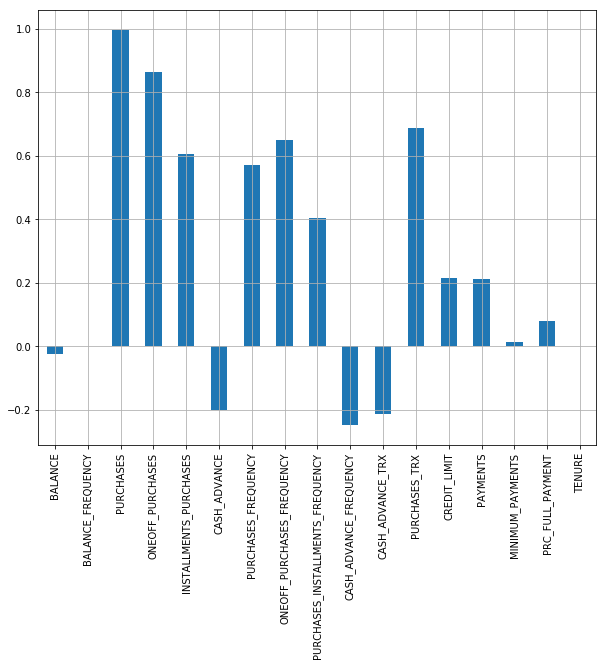

In [36]:

plt.figure(figsize=(10,8))
components_df.loc[0].plot(kind="bar")
plt.grid(True)

In [37]:
components_df.loc[0].sort_values()


CASH_ADVANCE_FREQUENCY             -0.248568
CASH_ADVANCE_TRX                   -0.214977
CASH_ADVANCE                       -0.199806
BALANCE                            -0.025506
TENURE                             -0.000000
BALANCE_FREQUENCY                   0.001609
MINIMUM_PAYMENTS                    0.013869
PRC_FULL_PAYMENT                    0.079183
PAYMENTS                            0.210395
CREDIT_LIMIT                        0.215486
PURCHASES_INSTALLMENTS_FREQUENCY    0.402919
PURCHASES_FREQUENCY                 0.569656
INSTALLMENTS_PURCHASES              0.606326
ONEOFF_PURCHASES_FREQUENCY          0.649062
PURCHASES_TRX                       0.687207
ONEOFF_PURCHASES                    0.863917
PURCHASES                           0.996624
Name: 0, dtype: float64

In [38]:
cluster_df=df[['PURCHASES','ONEOFF_PURCHASES','PURCHASES_TRX','ONEOFF_PURCHASES_FREQUENCY','INSTALLMENTS_PURCHASES','PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CREDIT_LIMIT','PAYMENTS','CASH_ADVANCE_FREQUENCY']]

In [39]:
cluster_df.head()


PURCHASES  ONEOFF_PURCHASES  PURCHASES_TRX  ONEOFF_PURCHASES_FREQUENCY  \
0       95.40              0.00              2                    0.000000   
4       16.00             16.00              1                    0.083333   
7      436.20              0.00             12                    0.000000   
8      861.49            661.49              5                    0.083333   
14       0.00              0.00              0                    0.000000   

    INSTALLMENTS_PURCHASES  PURCHASES_FREQUENCY  \
0                     95.4             0.166667   
4                      0.0             0.083333   
7                    436.2             1.000000   
8                    200.0             0.333333   
14                     0.0             0.000000   

    PURCHASES_INSTALLMENTS_FREQUENCY  CREDIT_LIMIT    PAYMENTS  \
0                           0.083333        1000.0  201.802084   
4                           0.000000        1200.0  678.334763   
7                           1.000000        2300.0  679.065082   
8                           0.250000        7000.0  688.278568   
14                          0.000000        3000.0  805.647974   

    CASH_ADVANCE_FREQUENCY  
0                 0.000000  
4                 0.000000  
7                 0.000000  
8                 0.000000  
14                0.083333

In [40]:
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
import time

In [41]:
distortions = []
K = range(1,6)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(cluster_df)
    distortions.append(kmeanModel.inertia_)

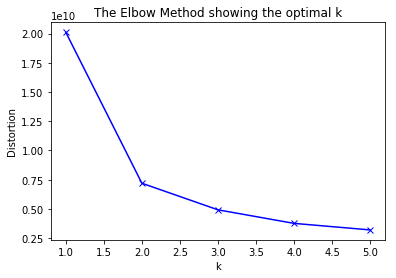

In [42]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [43]:
km = KMeans(init="random", n_clusters=2)
km.fit(cluster_df)


KMeans(init='random', n_clusters=2)

In [58]:
#finding the centriod in the cluster
centroids=km.cluster_centers_
centroids

array([[3.34478965e+02, 1.69384389e+02, 7.31316574e+00, 1.03323355e-01,
        1.65294095e+02, 3.85634123e-01, 3.01732723e-01, 2.11259054e+03,
        7.62158607e+02, 1.05489251e-01],
       [5.28528169e+02, 3.12017950e+02, 8.86697966e+00, 1.58841900e-01,
        2.16956150e+02, 4.15492942e-01, 3.00469495e-01, 7.17148954e+03,
        1.00923896e+03, 8.67240172e-02]])

In [44]:
labels=km.labels_

labels=labels.tolist()
labels=pd.Series(data=labels,index=range(len(labels)))
labels_x=list() #Extracting the various clusters formed
for i in range(10):
    labels_x.append(labels[labels.values==i])

# Cluster 1

In [45]:
cluster_df.iloc[labels_x[0].index,:].describe().T


count         mean          std    min  \
PURCHASES                         2347.0   334.478965   403.064274    0.0   
ONEOFF_PURCHASES                  2347.0   169.384389   306.221639    0.0   
PURCHASES_TRX                     2347.0     7.313166     8.548463    0.0   
ONEOFF_PURCHASES_FREQUENCY        2347.0     0.103323     0.166008    0.0   
INSTALLMENTS_PURCHASES            2347.0   165.294095   241.039934    0.0   
PURCHASES_FREQUENCY               2347.0     0.385634     0.376521    0.0   
PURCHASES_INSTALLMENTS_FREQUENCY  2347.0     0.301733     0.378223    0.0   
CREDIT_LIMIT                      2347.0  2112.590541  1020.891210  150.0   
PAYMENTS                          2347.0   762.158607   674.167249    0.0   
CASH_ADVANCE_FREQUENCY            2347.0     0.105489     0.127318    0.0   

                                          25%          50%          75%  \
PURCHASES                            0.000000   190.960000   525.520000   
ONEOFF_PURCHASES                     0.000000     0.000000   205.500000   
PURCHASES_TRX                        0.000000     4.000000    12.000000   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.000000     0.166667   
INSTALLMENTS_PURCHASES               0.000000     0.000000   277.370000   
PURCHASES_FREQUENCY                  0.000000     0.250000     0.750000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.000000     0.583333   
CREDIT_LIMIT                      1200.000000  1800.000000  3000.000000   
PAYMENTS                           327.061057   554.325638   938.760527   
CASH_ADVANCE_FREQUENCY               0.000000     0.083333     0.166667   

                                          max  
PURCHASES                         2315.860000  
ONEOFF_PURCHASES                  1440.140000  
PURCHASES_TRX                       41.000000  
ONEOFF_PURCHASES_FREQUENCY           0.750000  
INSTALLMENTS_PURCHASES            1166.680000  
PURCHASES_FREQUENCY                  1.000000  
PURCHASES_INSTALLMENTS_FREQUENCY     1.000000  
CREDIT_LIMIT                      4600.000000  
PAYMENTS                          4138.243604  
CASH_ADVANCE_FREQUENCY               0.500000

In [46]:
cluster0_data=cluster_df.iloc[labels_x[0].index,:]


# Cluster 2

In [47]:
cluster_df.iloc[labels_x[1].index,:].describe().T


count         mean          std     min  \
PURCHASES                         639.0   528.528169   542.524917     0.0   
ONEOFF_PURCHASES                  639.0   312.017950   395.138593     0.0   
PURCHASES_TRX                     639.0     8.866980     9.710197     0.0   
ONEOFF_PURCHASES_FREQUENCY        639.0     0.158842     0.189879     0.0   
INSTALLMENTS_PURCHASES            639.0   216.956150   300.815322     0.0   
PURCHASES_FREQUENCY               639.0     0.415493     0.356449     0.0   
PURCHASES_INSTALLMENTS_FREQUENCY  639.0     0.300469     0.360151     0.0   
CREDIT_LIMIT                      639.0  7171.489543  1877.921402  4500.0   
PAYMENTS                          639.0  1009.238956   743.485162     0.0   
CASH_ADVANCE_FREQUENCY            639.0     0.086724     0.127732     0.0   

                                          25%          50%          75%  \
PURCHASES                           70.280000   354.920000   849.955000   
ONEOFF_PURCHASES                     0.000000   124.510000   517.800000   
PURCHASES_TRX                        1.000000     6.000000    13.000000   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.250000   
INSTALLMENTS_PURCHASES               0.000000    56.000000   359.340000   
PURCHASES_FREQUENCY                  0.083333     0.333333     0.750000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.083333     0.583333   
CREDIT_LIMIT                      6000.000000  6600.000000  8500.000000   
PAYMENTS                           540.665279   837.844106  1235.219803   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.166667   

                                           max  
PURCHASES                          2260.410000  
ONEOFF_PURCHASES                   1443.330000  
PURCHASES_TRX                        41.000000  
ONEOFF_PURCHASES_FREQUENCY            0.750000  
INSTALLMENTS_PURCHASES             1170.490000  
PURCHASES_FREQUENCY                   1.000000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.000000  
CREDIT_LIMIT                      13500.000000  
PAYMENTS                           4119.519203  
CASH_ADVANCE_FREQUENCY                0.500000

In [63]:
sns.pairplot(cluster_df, palette= 'Dark2', diag_kind='kde',size=20)


C:\Users\Saurav\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


 *  In our data installment frequency is highly negatively correlated to cash advance frequency .

 *  Credit limit is almost positively correlated with everything .

 *  Balance of the customers are highly positively correlated to payments , cash advance , credit limits byt highly negatively       correlated to % of months with full payments due balance .

 *   Purchases are highly positively correlated to credit limits & payments .

 *   Purchase frequency is highly negative with respect to cash advance frequency .

 * After finding K-mean clustering we got that the optimal K value is 2 I.e

   Optimal k = 2 .

 * Also optimal k from the elbow method came out to be 10. Therefore 10 clusters were formed .